# MIMIC II Surgixal Intensive Care Unit

## 1) Import Libraries

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix

## 2) Load the Data

In [104]:
df = pd.read_excel("MIMIC II Surgical Intensive Care Unit Data.xlsx")
pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_columns')
df

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,service_num,day_icu_intime,day_icu_intime_num,hour_icu_intime,hosp_exp_flg,icu_exp_flg,day_28_flg,mort_day_censored,censor_flg,sepsis_flg,chf_flg,afib_flg,renal_flg,liver_flg,copd_flg,cad_flg,stroke_flg,mal_flg,resp_flg,map_1st,hr_1st,temp_1st,spo2_1st,abg_count,wbc_first,hgb_first,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,7.63,13,72.36841,1,75.0,29.912791,15,9,SICU,1,Friday,6,6,1,0,1,11.92,0,0,0,0,0,0,0,0,0,1,0,92.000,86,95.900002,100,22,8.1,14.1,354,138,4.6,15.0,109,41,1.6,196,39,2230.875000
1,1,0.58,3,44.49191,0,0.0,0.000000,21,7,SICU,1,Saturday,7,4,1,1,1,0.00,0,0,0,0,0,0,0,0,0,1,0,101.000,125,100.099998,100,4,7.1,12.6,262,139,4.2,31.0,100,16,0.5,146,23,0.000000
2,1,1.75,5,23.74217,1,95.2,28.464563,18,7,SICU,1,Saturday,7,7,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,105.000,107,96.300003,100,9,4.8,10.7,22,146,3.4,19.0,110,10,1.0,134,30,2358.244141
3,0,1.38,9,36.54657,1,72.0,23.982402,14,5,SICU,1,Sunday,1,12,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,104.000,90,98.400002,100,0,12.1,14.4,182,145,3.6,26.0,110,10,0.7,0,0,1877.560059
4,1,7.06,27,24.64717,1,90.0,25.474850,15,6,SICU,1,Saturday,7,22,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,1,101.667,94,100.400002,100,18,21.6,13.4,130,143,3.8,32.0,104,17,1.3,38,62,648.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0,2.27,2,50.15744,0,0.0,0.000000,14,7,SICU,1,Saturday,7,18,1,1,1,1.42,0,0,0,0,0,0,0,0,1,0,1,112.000,98,100.300003,99,1,11.7,11.2,159,139,4.0,22.0,103,22,1.2,144,36,650.000000
978,0,1.08,3,77.96057,0,0.0,0.000000,16,5,SICU,1,Friday,6,12,1,0,1,2.67,0,0,0,1,0,0,0,0,1,0,0,85.000,68,98.000000,100,0,13.7,12.2,312,142,3.3,24.0,107,16,0.8,0,0,150.000000
979,0,2.45,3,33.04643,1,84.0,0.000000,16,6,SICU,1,Saturday,7,11,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,103.000,92,98.800003,100,1,28.8,10.2,177,138,3.7,15.0,113,15,1.2,158,45,1836.659912
980,1,3.70,4,72.44020,0,60.0,0.000000,14,5,SICU,1,Saturday,7,23,1,1,1,3.21,0,0,0,1,0,0,0,0,1,1,0,94.000,50,98.400002,99,4,7.6,14.6,363,138,6.3,22.0,104,20,0.8,154,45,289.950012


In [105]:
df.dtypes

aline_flg               int64
icu_los_day           float64
hospital_los_day        int64
age                   float64
gender_num              int64
weight_first          float64
bmi                   float64
sapsi_first             int64
sofa_first              int64
service_unit           object
service_num             int64
day_icu_intime         object
day_icu_intime_num      int64
hour_icu_intime         int64
hosp_exp_flg            int64
icu_exp_flg             int64
day_28_flg              int64
mort_day_censored     float64
censor_flg              int64
sepsis_flg              int64
chf_flg                 int64
afib_flg                int64
renal_flg               int64
liver_flg               int64
copd_flg                int64
cad_flg                 int64
stroke_flg              int64
mal_flg                 int64
resp_flg                int64
map_1st               float64
hr_1st                  int64
temp_1st              float64
spo2_1st                int64
abg_count 

In [106]:
df.describe()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_num,day_icu_intime_num,hour_icu_intime,hosp_exp_flg,icu_exp_flg,day_28_flg,mort_day_censored,censor_flg,sepsis_flg,chf_flg,afib_flg,renal_flg,liver_flg,copd_flg,cad_flg,stroke_flg,mal_flg,resp_flg,map_1st,hr_1st,temp_1st,spo2_1st,abg_count,wbc_first,hgb_first,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.0,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.0,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000
mean,0.706721,3.534155,9.007128,53.144155,0.618126,75.667546,18.620344,13.628310,5.827902,1.0,4.069246,10.237271,0.145621,0.103870,0.155804,611.874552,0.749491,0.0,0.063136,0.110998,0.013238,0.044807,0.049898,0.064155,0.185336,0.132383,0.155804,88.792940,85.759674,97.580957,98.947047,7.133401,12.707963,12.744603,244.015275,139.598778,4.000611,24.018228,104.328921,16.809572,0.996741,221.572301,36.917515,1624.942100
std,0.455497,3.669347,8.837931,21.407871,0.486093,26.059355,13.557910,4.957858,2.182760,0.0,2.018086,7.850392,0.352906,0.305247,0.362855,355.217998,0.433527,0.0,0.243332,0.314290,0.114352,0.206984,0.217846,0.245153,0.388768,0.339079,0.362855,17.188050,18.256784,5.940972,4.653021,10.039551,6.078140,2.231337,91.448301,7.467355,0.746135,4.205075,7.021357,9.826600,0.693166,153.155829,14.891737,1654.865304
min,0.000000,0.500000,1.000000,15.190460,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,33.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.412500,4.000000,35.547540,0.000000,64.150000,0.000000,11.000000,4.000000,1.0,2.000000,3.000000,0.000000,0.000000,0.000000,727.280000,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.666702,73.000000,96.800003,99.000000,1.000000,8.625000,11.400000,185.000000,138.000000,3.600000,22.000000,101.000000,11.000000,0.700000,104.250000,34.000000,260.329155
50%,1.000000,2.295000,7.000000,52.277470,1.000000,76.900000,22.898715,14.000000,6.000000,1.0,4.000000,8.000000,0.000000,0.000000,0.000000,731.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.000000,85.000000,98.099998,100.000000,4.000000,11.700000,12.900000,237.000000,140.000000,3.900000,24.000000,105.000000,15.000000,0.900000,198.000000,39.000000,1134.629944
75%,1.000000,4.095000,11.000000,72.525320,1.000000,89.000000,28.206258,17.000000,7.000000,1.0,6.000000,18.000000,0.000000,0.000000,0.000000,731.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.666702,97.750000,99.300003,100.000000,9.000000,15.600000,14.375000,295.750000,142.000000,4.300000,27.000000,107.000000,20.000000,1.100000,325.750000,44.000000,2573.405883
max,1.000000,28.240000,112.000000,96.454240,1.000000,211.000000,53.174533,32.000000,16.000000,1.0,7.000000,23.000000,1.000000,1.000000,1.000000,3000.920000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,153.332993,153.000000,103.599998,100.000000,115.000000,86.000000,18.200000,681.000000,157.000000,9.200000,40.000000,133.000000,139.000000,9.400000,634.000000,89.000000,10360.624020


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   aline_flg           982 non-null    int64  
 1   icu_los_day         982 non-null    float64
 2   hospital_los_day    982 non-null    int64  
 3   age                 982 non-null    float64
 4   gender_num          982 non-null    int64  
 5   weight_first        982 non-null    float64
 6   bmi                 982 non-null    float64
 7   sapsi_first         982 non-null    int64  
 8   sofa_first          982 non-null    int64  
 9   service_unit        982 non-null    object 
 10  service_num         982 non-null    int64  
 11  day_icu_intime      982 non-null    object 
 12  day_icu_intime_num  982 non-null    int64  
 13  hour_icu_intime     982 non-null    int64  
 14  hosp_exp_flg        982 non-null    int64  
 15  icu_exp_flg         982 non-null    int64  
 16  day_28_f

## 2) Create pairwise scatterplots of variables of interest

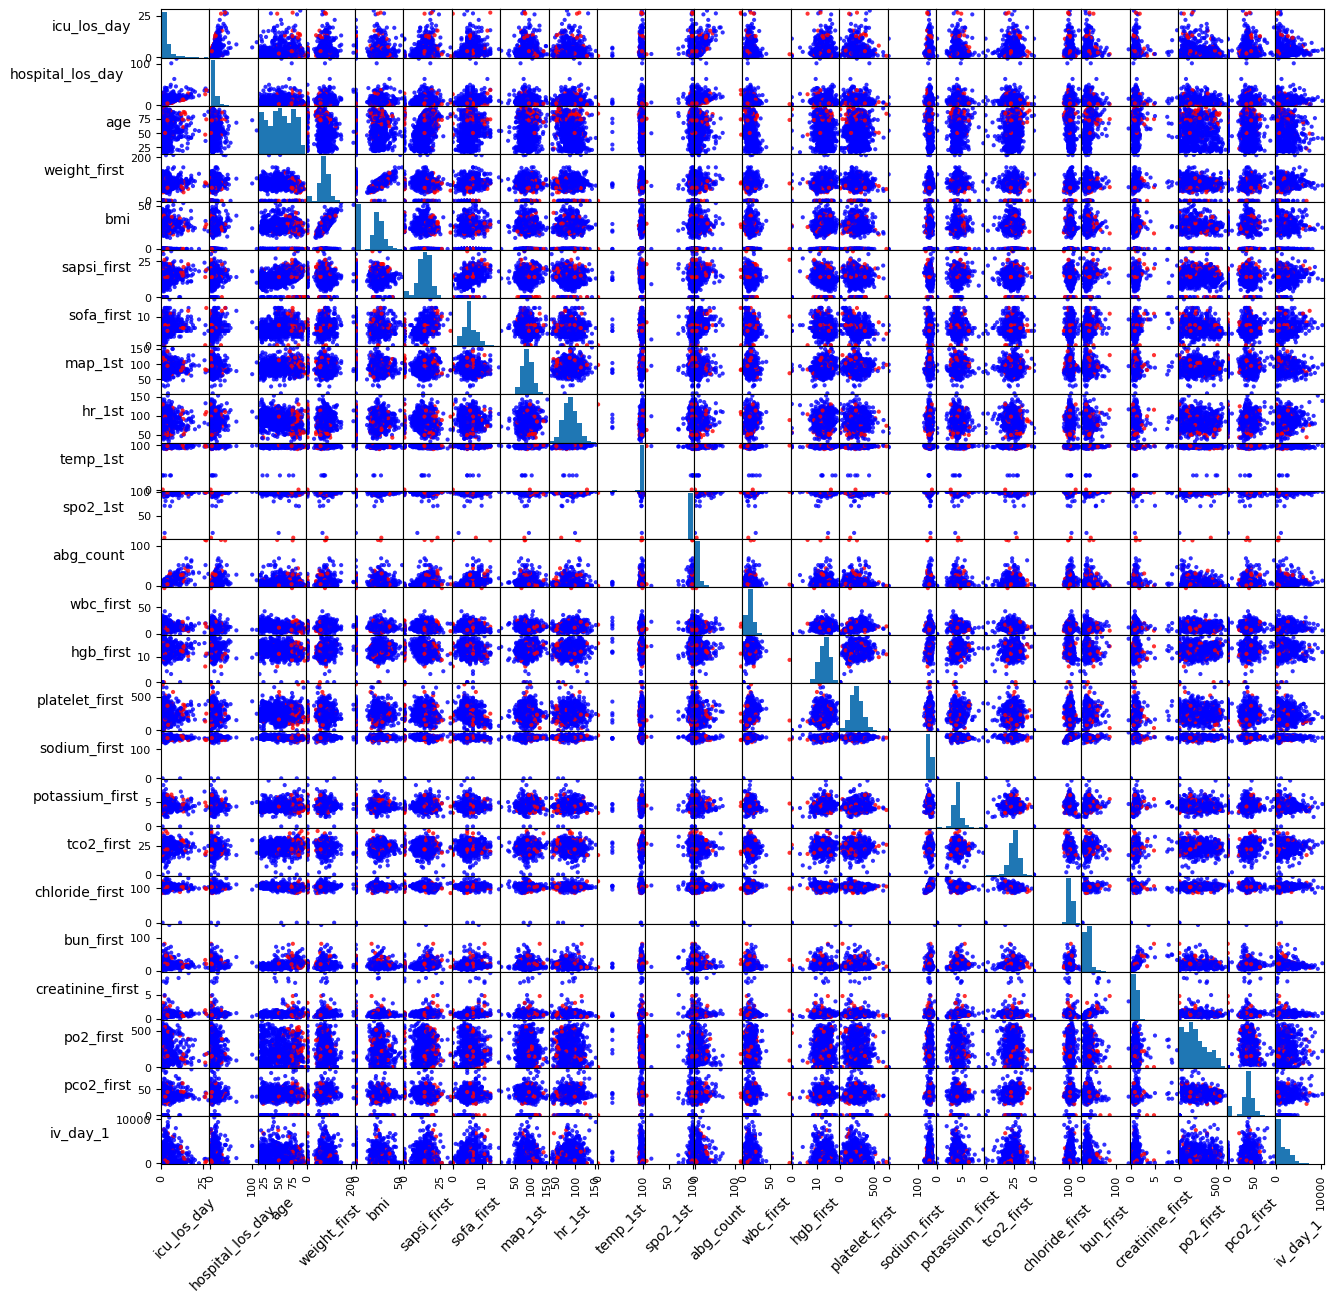

In [108]:
# Selecting the numerical variables of interest
num_vars = df.select_dtypes(include='number')
num_vars_ints = num_vars[["icu_los_day", "hospital_los_day", "age", "weight_first", "bmi", "sapsi_first", "sofa_first",
                           "map_1st", "hr_1st", "temp_1st", "spo2_1st", "abg_count", "wbc_first", "hgb_first",
                           "platelet_first", "sodium_first", "potassium_first", "tco2_first", "chloride_first",
                           "bun_first", "creatinine_first", "po2_first", "pco2_first", "iv_day_1"]]

# Assigning colors based on variables, where 0 represents no deaths in the ICU, and 1 represents deaths.
colors = df['icu_exp_flg'].map({0: 'blue', 1: 'red'})

# Creating scatter matrix
scatter_matrix(num_vars_ints, alpha=0.8, figsize=(15, 15), diagonal='hist', c=colors)

for ax in plt.gcf().axes:
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.show()

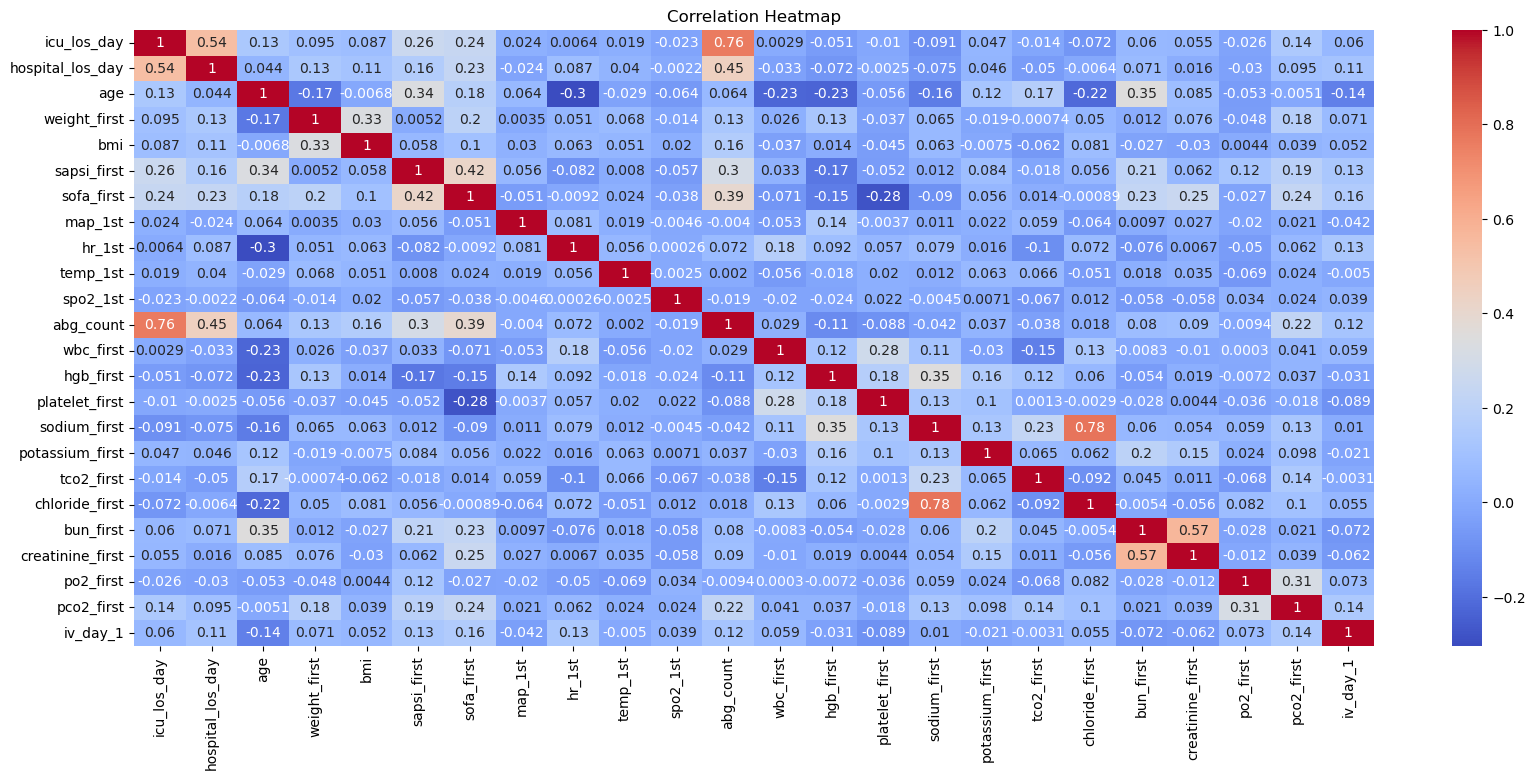

In [109]:
# Creating the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(num_vars_ints.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

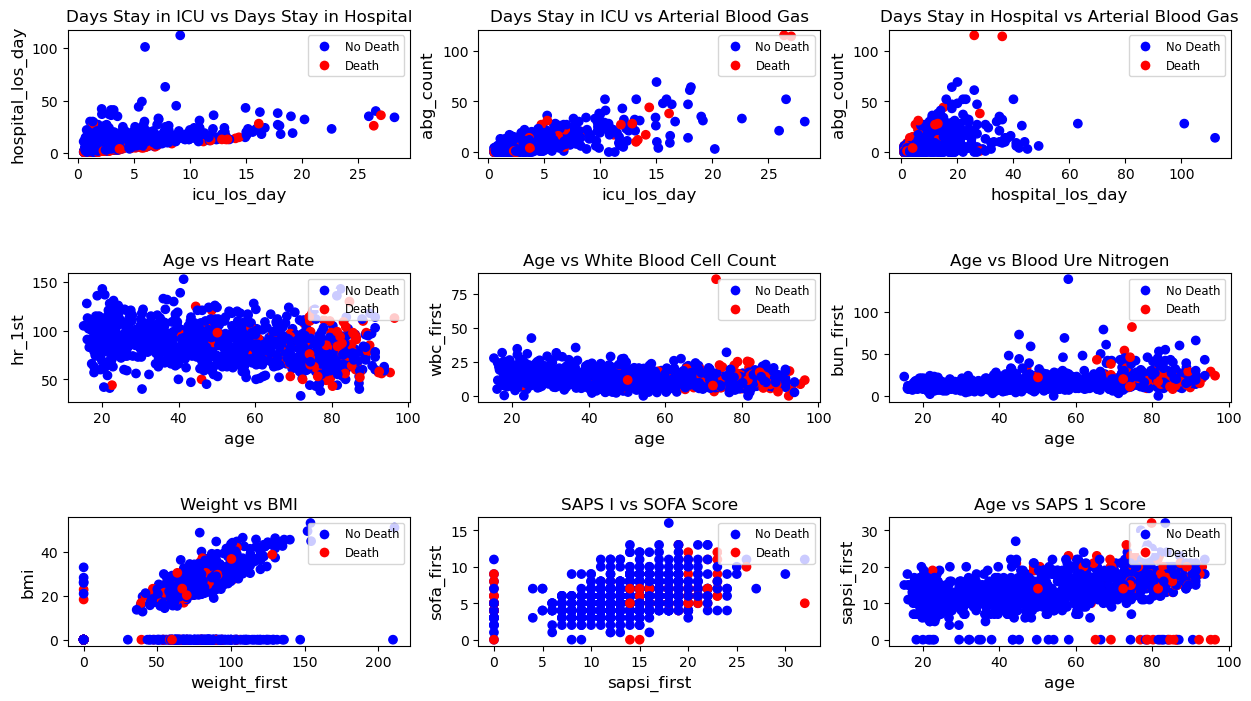

In [110]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

colors = df['icu_exp_flg'].map({0: 'blue', 1: 'red'})

scatter = []

# Visualizing variables with the strongest correlations
columns = [['icu_los_day', 'hospital_los_day'],
            ['icu_los_day', 'abg_count'],
            ['hospital_los_day', 'abg_count'],
            ['age', 'hr_1st'],
            ['age', 'wbc_first'],
            ['age', 'bun_first'],
            ['weight_first', 'bmi'],
            ['sapsi_first', 'sofa_first'],
            ['age', 'sapsi_first']]


for i in range(3):
    for j in range(3):
        axes[i, j].set_xlabel(columns[i * 3 + j][0], fontsize=12)
        axes[i, j].set_ylabel(columns[i * 3 + j][1], fontsize=12)
        scatter = axes[i, j].scatter(df[columns[i * 3 + j][0]], df[columns[i * 3 + j][1]], c=colors)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)]
labels = ['No Death', 'Death']


axes[0, 0].legend(handles, labels, loc='upper right',fontsize='small')
axes[0, 1].legend(handles, labels, loc='upper right',fontsize='small')
axes[0, 2].legend(handles, labels, loc='upper right',fontsize='small')
axes[1, 0].legend(handles, labels, loc='upper right',fontsize='small')
axes[1, 1].legend(handles, labels, loc='upper right',fontsize='small')
axes[1, 2].legend(handles, labels, loc='upper right',fontsize='small')
axes[2, 0].legend(handles, labels, loc='upper right',fontsize='small')
axes[2, 1].legend(handles, labels, loc='upper right',fontsize='small')
axes[2, 2].legend(handles, labels, loc='upper right',fontsize='small')


axes[0, 0].set_title('Days Stay in ICU vs Days Stay in Hospital')
axes[0, 1].set_title('Days Stay in ICU vs Arterial Blood Gas')
axes[0, 2].set_title('Days Stay in Hospital vs Arterial Blood Gas')
axes[1, 0].set_title('Age vs Heart Rate')
axes[1, 1].set_title('Age vs White Blood Cell Count')
axes[1, 2].set_title('Age vs Blood Ure Nitrogen')
axes[2, 0].set_title('Weight vs BMI')
axes[2, 1].set_title('SAPS I vs SOFA Score')
axes[2, 2].set_title('Age vs SAPS 1 Score')

plt.subplots_adjust(hspace=0.9)
plt.show()


1-	Days Stay in ICU vs Days Stay in Hospital: The visualization reveals a correlation between ICU duration and overall hospital stay, especially in severe cases. Outcomes, 'Deaths' and 'No Deaths,' offer insights into the link between ICU duration and mortality. Extended ICU periods may indicate higher risks, underscoring the importance of ICU duration in patient mortality.

2-	Days Stay in ICU vs Arterial Blood Gas: The visualization indicates higher mortality probability with extended ICU stays, especially when coupled with frequent Arterial Blood Gas (ABG) tests exceeding 50, particularly beyond 25 days. Prolonged ICU stays and increased ABG tests signal a higher likelihood of adverse outcomes, potentially leading to mortality.

3-	Days Stay in Hospital vs Arterial Blood Gas: The visualization indicates that when Arterial Blood Gas tests are conducted more than 50 times within a span of fewer than 40 days, the mortality rate tends to be hh


er.
4-	Age vs Heart Rate: As depicted in this graph, as age increases, the heart rate slows down, correlating with higher mortality rates, especially after the ag 

 
 40.
5-	Age vs White Blood Cell Count: White blood cell count tends to decrease with age, correlating with higher mortality rates, particularly in individuals over 60 years of

  age.
6-	Age vs Blood Urea Nitrogen: In contrast to white blood cells, Blood Urea Nitrogen (BUN) levels tend to increase after the age of 60. Infants generally have lower levels, and elevated BUN may indicate impaired kidney function, especially in older individuals. (Mayo C c,

 
 2023)
7-	Weight vs BMI: Weight and Body Mass Index (BMI) show a strong correlation. BMI, a measure of weight relative to height, is indicative of underweight, healthy weight, overweight, and obesity. Lower BMI has been associated with higher mortality rates, even after adjusting for other risk factors. (National Institute oealth


, 2016)
8-	SAPS I vs SOFA Score: Both SAPS I (Simplified Acute Physiology Score I) and SOFA (Sequential Organ Failure Assessment) are scoring systems used to assess illness severity and predict mortality in critical care settings. Higher scores in either system generally correlate with an increased likelih of mo


rtality.
9-	Age vs SAPS 1 Score: Individuals aged over 50 tend to receive higher scores in SAPS I, indicating an elevated likelihood of mortality. 

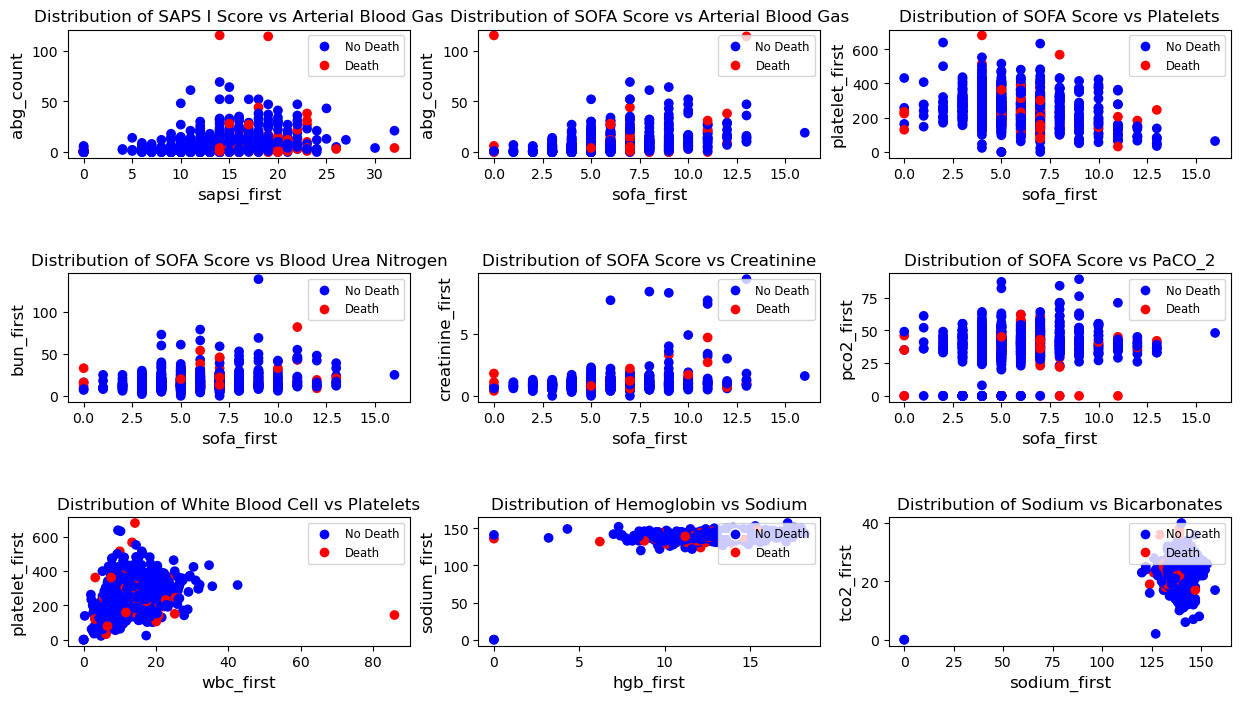

In [111]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

colors = df['icu_exp_flg'].map({0: 'blue', 1: 'red'})

scatter = []


columns = [['sapsi_first', 'abg_count'],
            ['sofa_first', 'abg_count'],
            ['sofa_first', 'platelet_first'],
            ['sofa_first', 'bun_first'],
            ['sofa_first', 'creatinine_first'],
            ['sofa_first', 'pco2_first'],
            ['wbc_first', 'platelet_first'],
            ['hgb_first', 'sodium_first'],
            ['sodium_first', 'tco2_first']]


for i in range(3):
    for j in range(3):
        axes[i, j].set_xlabel(columns[i * 3 + j][0], fontsize=12)
        axes[i, j].set_ylabel(columns[i * 3 + j][1], fontsize=12)
        scatter = axes[i, j].scatter(df[columns[i * 3 + j][0]], df[columns[i * 3 + j][1]], c=colors)


handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)]
labels = ['No Death', 'Death']


for i in range(3):
    for j in range(3):
        axes[i, j].legend(handles, labels, loc='upper right', fontsize='small')


axes[0, 0].set_title('Distribution of SAPS I Score vs Arterial Blood Gas')
axes[0, 1].set_title('Distribution of SOFA Score vs Arterial Blood Gas')
axes[0, 2].set_title('Distribution of SOFA Score vs Platelets')
axes[1, 0].set_title('Distribution of SOFA Score vs Blood Urea Nitrogen')
axes[1, 1].set_title('Distribution of SOFA Score vs Creatinine')
axes[1, 2].set_title('Distribution of SOFA Score vs PaCO_2')
axes[2, 0].set_title('Distribution of White Blood Cell vs Platelets')
axes[2, 1].set_title('Distribution of Hemoglobin vs Sodium')
axes[2, 2].set_title('Distribution of Sodium vs Bicarbonates')

plt.subplots_adjust(hspace=0.9)
plt.show()


10-	Distribution of SAPS I Score vs Arterial Blood Gas: A higher SAPS I (Simplified Acute Physiology Score I) score, exceeding 15, coupled with Arterial Blood Gas tests conducted more than 50 times, indicates an increased likelihood of mortality.

11-	Distribution of SOFA Score vs Arterial Blood Gas: Like SAPS I, a higher SOFA Score, exceeding 5.0, along with Arterial Blood Gas tests conducted more than 50 times, suggests an increased likelihood of mortaliy

.
12-	Distribution of SOFA Score vs Platelets: When the SOFA Score is higher than 5.0, and the platelet count falls outside the normal range (150,000 to 450,000 platelets per microliter of blood), there is an increased likelihood of morta


y.
13-	Distribution of SOFA Score vs Blood Urea Nitrogen: A SOFA Score exceeding 5.0 combined with an increase in Blood Urea Nitrogen over 40 mg/dL is associated with an increased likelihood of mori


ty.
14-	Distribution of SOFA Score vs Creatinine: Mortality risk is elevated in patients with creatinine levels below 0.4 mg/dL or above 1.4 mg/dL. Additionally, a higher SOFA Score correlates with an increased likelihood of mortality (Source: European Review of Medical and Pharmacological Science20


23).
15-	Distribution of SOFA Score vs PaCO2: A higher SOFA Score, exceeding 5, coupled with abnormal PaCO₂ levels (typically 35 to 45 mm Hg), indicates a greater severity of organ dysfunction or failure, contributing to an increased likelihood of mortality (Source: StatPearls - NCBI Bsh



lf).
16-	Distribution of White Blood Cell vs Platelets: Alterations in white blood cell (WBC) count and platelet count can indicate underlying health issues. High WBC count and platelet count may suggest specific conditions. Normal ranges are around 4,000 to 11,000 WBCs/µL and 150,000 to 450,000 platelets/µL, pect


ively.
17-	Distribution of Hemoglobin vs Sodium: Both hemoglobin and sodium levels are crucial indicators of health. Adult reference ranges are around¿ to 16 g/dL for hemoglobin and 135 to 145 mmol/L for sodium. Abnormal levels may indicate underlying healhcond
i

tions.
18-	Distribution of Sodium vs Bicarbonates: Abnormal levels of sodium and bicarbonates may indicate underlying health conditions. The normal range for total carbon dioxide levels is typically around 23 to 29 mmol/L (Source: StatPearls - NCBI Bookshelf). Healthcare providers may perform additional tests to determine the cause and appropriate management of these abnormalrtality. 

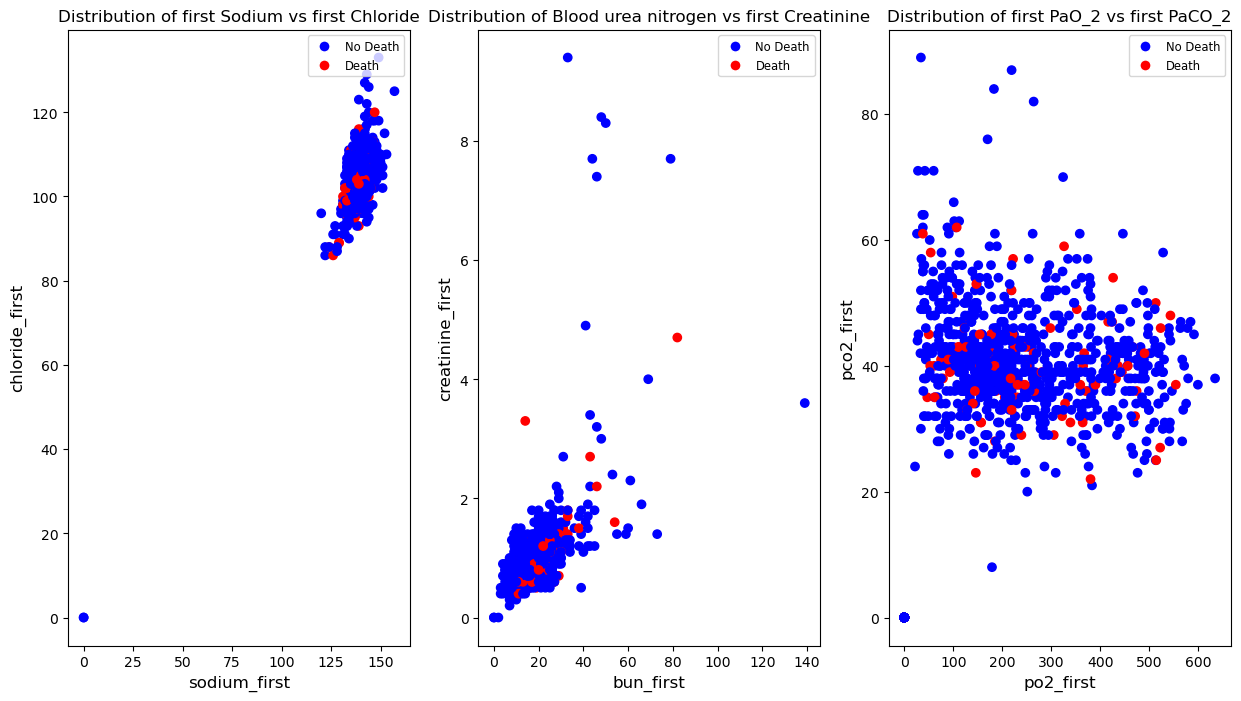

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

colors = df['icu_exp_flg'].map({0: 'blue', 1: 'red'})

scatter = []


columns_set2 = [['sodium_first', 'chloride_first'],
                ['bun_first', 'creatinine_first'],
                ['po2_first', 'pco2_first']]


for i in range(3):
    axes[i].set_xlabel(columns_set2[i][0], fontsize=12)
    axes[i].set_ylabel(columns_set2[i][1], fontsize=12)
    scatter = axes[i].scatter(df[columns_set2[i][0]], df[columns_set2[i][1]], c=colors)


handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8)]
labels = ['No Death', 'Death']


for i in range(3):
    axes[i].legend(handles, labels, loc='upper right', fontsize='small')

axes[0].set_title('Distribution of first Sodium vs first Chloride')
axes[1].set_title('Distribution of Blood urea nitrogen vs first Creatinine')
axes[2].set_title('Distribution of first PaO_2 vs first PaCO_2')


plt.subplots_adjust(hspace=0.9)


plt.show()

19-	Distribution of  Sodium vs Chloride: Sodium and chloride balance is crucial for overall health, with abnormal levels indicating potential medical conditions. Normal ranges are around 135-145 mmol/L for sodium and 95-105 mmol/L for chloride.

20-	Distribution of Blood Urea Nitrogen vs Creatinine: BUN and creatinine levels, measured for kidney function assessment, help detect kidney disorders or dehydration. Normal ranges are approximately 7-20 mg/dL for BUN and 0.6-1.2 mg/dL for creatinie

.
21-	PaO₂ vs PaCO₂: PaO₂ and PaCO₂ values, vital for respiratory function, are measured in blood gas analysis. Normal ranges are 75-100 mmHg for PaO₂ and 35-45 mmHg for PaCO₂. Abnormalities signal respiratory dysfunction, guiding healthcare professionals in evaluation and management.

## 3) Create box plots to identify outliers

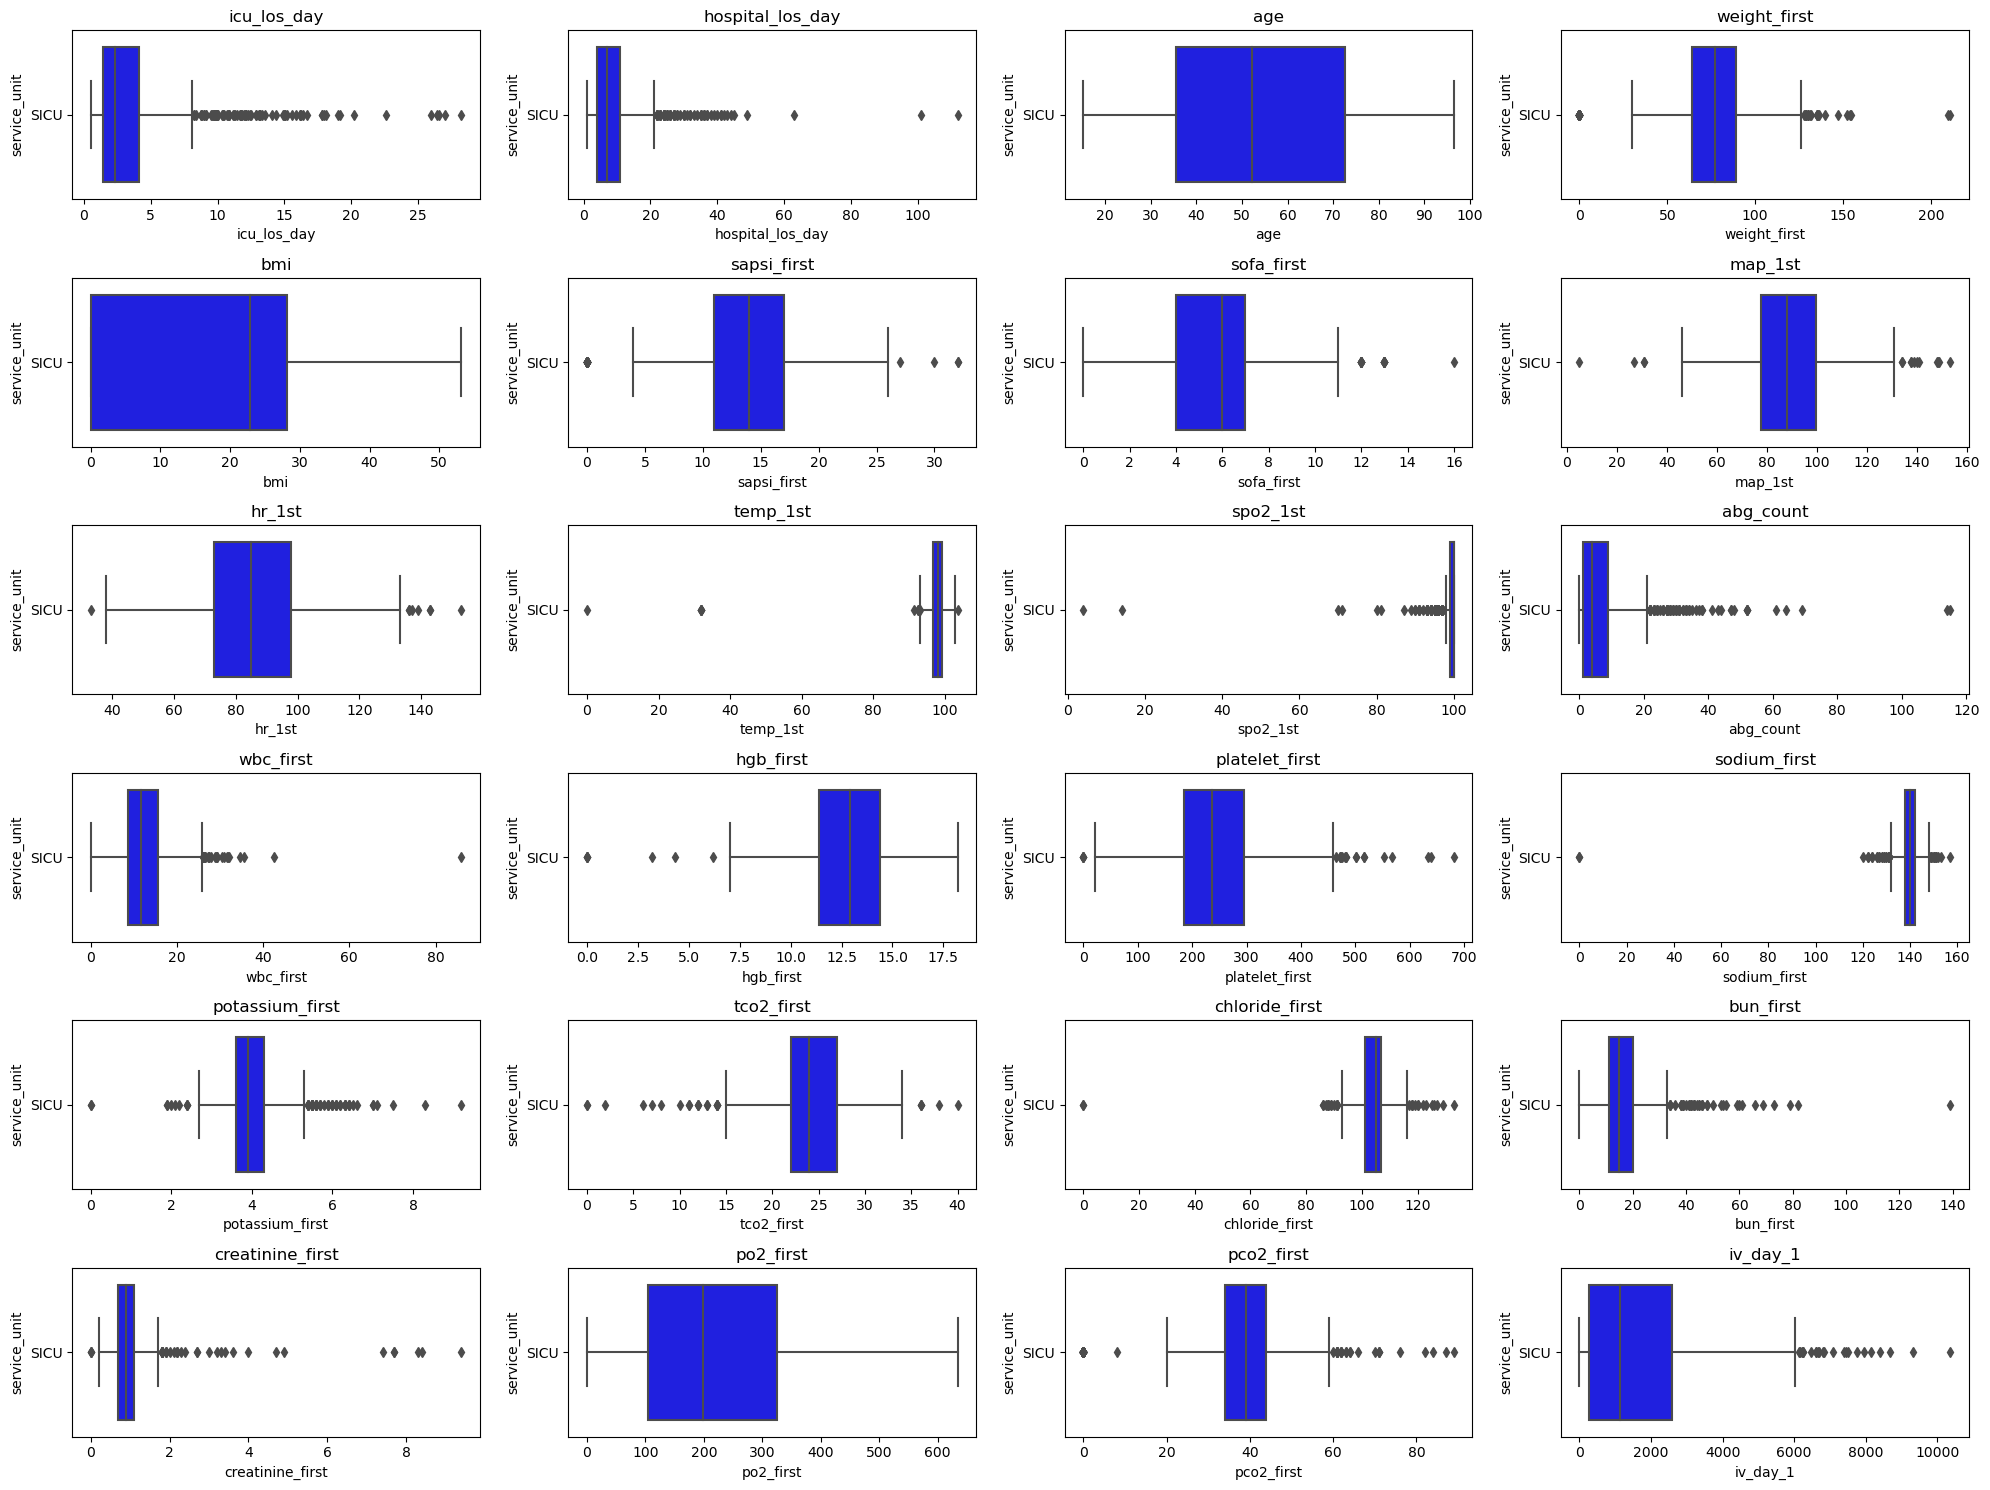

In [113]:

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 15))

count = 0

for variable in num_vars_ints.columns:
    count += 1
    ax = axes.flatten()[count - 1]  
    sns.boxplot(x=df[variable].dropna(), y=df['service_unit'], ax=ax, color='blue')

    ax.set_title(variable)
    ax.set_xlabel(variable)
    ax.set_ylabel('service_unit')  

plt.tight_layout()
plt.show()

In [114]:
Initial_Null_Value = df.isnull().sum().sum()
print(Initial_Null_Value)

0


## 4) Data Cleaning and Preprocessing

In [115]:

# Defining outliers as Nulls values
df.loc[df['icu_los_day'] > 5.5, 'icu_los_day'] = np.nan
df.loc[df['hospital_los_day'] >= 20, 'hospital_los_day'] = np.nan


df.loc[df['weight_first'] < 40, 'weight_first'] = np.nan
df.loc[df['weight_first'] >= 120, 'weight_first'] = np.nan

df.loc[df['bmi'] <= 0, 'bmi'] = np.nan

df.loc[df['sapsi_first'] <= 0, 'sapsi_first'] = np.nan
df.loc[df['sapsi_first'] >= 23, 'sapsi_first'] = np.nan

df.loc[df['sofa_first'] <= 0, 'sofa_first'] = np.nan
df.loc[df['sofa_first'] > 11, 'sofa_first'] = np.nan


df.loc[df['map_1st'] < 40, 'map_1st'] = np.nan
df.loc[df['map_1st'] > 130, 'map_1st'] = np.nan

df.loc[df['hr_1st'] < 37, 'hr_1st'] = np.nan
df.loc[df['hr_1st'] > 135, 'hr_1st'] = np.nan

df.loc[df['temp_1st'] <= 93, 'temp_1st'] = np.nan
df.loc[df['temp_1st'] >= 103, 'temp_1st'] = np.nan

df.loc[df['spo2_1st'] <= 97, 'spo2_1st'] = np.nan

df.loc[df['abg_count'] <= 0, 'abg_count'] = np.nan
df.loc[df['abg_count'] >= 15, 'abg_count'] = np.nan


df.loc[df['wbc_first'] <= 0, 'wbc_first'] = np.nan
df.loc[df['wbc_first'] >= 25, 'wbc_first'] = np.nan

df.loc[df['hgb_first'] < 5.5, 'hgb_first'] = np.nan

df.loc[df['platelet_first'] <= 90, 'platelet_first'] = np.nan
df.loc[df['platelet_first'] > 450, 'platelet_first'] = np.nan

df.loc[df['sodium_first'] <= 131, 'sodium_first'] = np.nan
df.loc[df['sodium_first'] > 148, 'sodium_first'] = np.nan

df.loc[df['creatinine_first'] <= 0, 'creatinine_first'] = np.nan
df.loc[df['creatinine_first'] > 1.95, 'creatinine_first'] = np.nan

df.loc[df['po2_first'] <= 0, 'po2_first'] = np.nan

df.loc[df['pco2_first'] < 22, 'pco2_first'] = np.nan
df.loc[df['pco2_first'] > 56, 'pco2_first'] = np.nan

df.loc[df['iv_day_1'] <= 0, 'iv_day_1'] = np.nan
df.loc[df['iv_day_1'] > 6000, 'iv_day_1'] = np.nan

df.loc[df['tco2_first'] < 15, 'tco2_first'] = np.nan
df.loc[df['tco2_first'] > 35, 'tco2_first'] = np.nan

df.loc[df['chloride_first'] <= 93, 'chloride_first'] = np.nan
df.loc[df['chloride_first'] > 116, 'chloride_first'] = np.nan

df.loc[df['potassium_first'] <= 2.5, 'potassium_first'] = np.nan
df.loc[df['potassium_first'] >= 5.5, 'potassium_first'] = np.nan

df.loc[df['bun_first'] > 30, 'bun_first'] = np.nan
df.loc[df['bun_first'] <= 0, 'bun_first'] = np.nan

df.loc[df['iv_day_1'] > 6000, 'iv_day_1'] = np.nan
df.loc[df['iv_day_1'] <= 0, 'iv_day_1'] = np.nan


In [116]:
total_null = df.isna().mean() * 100
print(total_null)

aline_flg              0.000000
icu_los_day           17.006110
hospital_los_day       8.350305
age                    0.000000
gender_num             0.000000
weight_first           9.775967
bmi                   31.059063
sapsi_first            6.924644
sofa_first             2.443992
service_unit           0.000000
service_num            0.000000
day_icu_intime         0.000000
day_icu_intime_num     0.000000
hour_icu_intime        0.000000
hosp_exp_flg           0.000000
icu_exp_flg            0.000000
day_28_flg             0.000000
mort_day_censored      0.000000
censor_flg             0.000000
sepsis_flg             0.000000
chf_flg                0.000000
afib_flg               0.000000
renal_flg              0.000000
liver_flg              0.000000
copd_flg               0.000000
cad_flg                0.000000
stroke_flg             0.000000
mal_flg                0.000000
resp_flg               0.000000
map_1st                1.731161
hr_1st                 0.814664
temp_1st

In [117]:
df

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,service_num,day_icu_intime,day_icu_intime_num,hour_icu_intime,hosp_exp_flg,icu_exp_flg,day_28_flg,mort_day_censored,censor_flg,sepsis_flg,chf_flg,afib_flg,renal_flg,liver_flg,copd_flg,cad_flg,stroke_flg,mal_flg,resp_flg,map_1st,hr_1st,temp_1st,spo2_1st,abg_count,wbc_first,hgb_first,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,NaN,13.0,72.36841,1,75.0,29.912791,15.0,9.0,SICU,1,Friday,6,6,1,0,1,11.92,0,0,0,0,0,0,0,0,0,1,0,92.000,86.0,95.900002,100.0,NaN,8.1,14.1,354.0,138.0,4.6,15.0,109.0,NaN,1.6,196.0,39.0,2230.875000
1,1,0.58,3.0,44.49191,0,NaN,NaN,21.0,7.0,SICU,1,Saturday,7,4,1,1,1,0.00,0,0,0,0,0,0,0,0,0,1,0,101.000,125.0,100.099998,100.0,4.0,7.1,12.6,262.0,139.0,4.2,31.0,100.0,16.0,0.5,146.0,23.0,NaN
2,1,1.75,5.0,23.74217,1,95.2,28.464563,18.0,7.0,SICU,1,Saturday,7,7,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,105.000,107.0,96.300003,100.0,9.0,4.8,10.7,NaN,146.0,3.4,19.0,110.0,10.0,1.0,134.0,30.0,2358.244141
3,0,1.38,9.0,36.54657,1,72.0,23.982402,14.0,5.0,SICU,1,Sunday,1,12,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,104.000,90.0,98.400002,100.0,NaN,12.1,14.4,182.0,145.0,3.6,26.0,110.0,10.0,0.7,NaN,NaN,1877.560059
4,1,NaN,NaN,24.64717,1,90.0,25.474850,15.0,6.0,SICU,1,Saturday,7,22,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,1,101.667,94.0,100.400002,100.0,NaN,21.6,13.4,130.0,143.0,3.8,32.0,104.0,17.0,1.3,38.0,NaN,648.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0,2.27,2.0,50.15744,0,NaN,NaN,14.0,7.0,SICU,1,Saturday,7,18,1,1,1,1.42,0,0,0,0,0,0,0,0,1,0,1,112.000,98.0,100.300003,99.0,1.0,11.7,11.2,159.0,139.0,4.0,22.0,103.0,22.0,1.2,144.0,36.0,650.000000
978,0,1.08,3.0,77.96057,0,NaN,NaN,16.0,5.0,SICU,1,Friday,6,12,1,0,1,2.67,0,0,0,1,0,0,0,0,1,0,0,85.000,68.0,98.000000,100.0,NaN,13.7,12.2,312.0,142.0,3.3,24.0,107.0,16.0,0.8,NaN,NaN,150.000000
979,0,2.45,3.0,33.04643,1,84.0,NaN,16.0,6.0,SICU,1,Saturday,7,11,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,103.000,92.0,98.800003,100.0,1.0,NaN,10.2,177.0,138.0,3.7,15.0,113.0,15.0,1.2,158.0,45.0,1836.659912
980,1,3.70,4.0,72.44020,0,60.0,NaN,14.0,5.0,SICU,1,Saturday,7,23,1,1,1,3.21,0,0,0,1,0,0,0,0,1,1,0,94.000,50.0,98.400002,99.0,4.0,7.6,14.6,363.0,138.0,NaN,22.0,104.0,20.0,0.8,154.0,45.0,289.950012


In [118]:
#Columns for which you want to fill null values with the mean
columns_to_fill = ['sapsi_first', 'icu_los_day', 'hospital_los_day','bmi','weight_first', 'abg_count',
                   'po2_first', 'pco2_first', 'iv_day_1', 'spo2_1st', 'sofa_first', 'map_1st', 'hr_1st',
                   'temp_1st', 'wbc_first', 'hgb_first', 'platelet_first', 'sodium_first', 'tco2_first',
                   'chloride_first', 'bun_first', 'creatinine_first', 'potassium_first','iv_day_1']

In [119]:
# Step 1: Create age ranges
df['ageRange'] = pd.cut(df['age'], bins=np.arange(1, 101, 11), right=False)
df

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,service_num,day_icu_intime,day_icu_intime_num,hour_icu_intime,hosp_exp_flg,icu_exp_flg,day_28_flg,mort_day_censored,censor_flg,sepsis_flg,chf_flg,afib_flg,renal_flg,liver_flg,copd_flg,cad_flg,stroke_flg,mal_flg,resp_flg,map_1st,hr_1st,temp_1st,spo2_1st,abg_count,wbc_first,hgb_first,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1,ageRange
0,1,NaN,13.0,72.36841,1,75.0,29.912791,15.0,9.0,SICU,1,Friday,6,6,1,0,1,11.92,0,0,0,0,0,0,0,0,0,1,0,92.000,86.0,95.900002,100.0,NaN,8.1,14.1,354.0,138.0,4.6,15.0,109.0,NaN,1.6,196.0,39.0,2230.875000,"[67, 78)"
1,1,0.58,3.0,44.49191,0,NaN,NaN,21.0,7.0,SICU,1,Saturday,7,4,1,1,1,0.00,0,0,0,0,0,0,0,0,0,1,0,101.000,125.0,100.099998,100.0,4.0,7.1,12.6,262.0,139.0,4.2,31.0,100.0,16.0,0.5,146.0,23.0,NaN,"[34, 45)"
2,1,1.75,5.0,23.74217,1,95.2,28.464563,18.0,7.0,SICU,1,Saturday,7,7,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,105.000,107.0,96.300003,100.0,9.0,4.8,10.7,NaN,146.0,3.4,19.0,110.0,10.0,1.0,134.0,30.0,2358.244141,"[23, 34)"
3,0,1.38,9.0,36.54657,1,72.0,23.982402,14.0,5.0,SICU,1,Sunday,1,12,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,104.000,90.0,98.400002,100.0,NaN,12.1,14.4,182.0,145.0,3.6,26.0,110.0,10.0,0.7,NaN,NaN,1877.560059,"[34, 45)"
4,1,NaN,NaN,24.64717,1,90.0,25.474850,15.0,6.0,SICU,1,Saturday,7,22,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,1,101.667,94.0,100.400002,100.0,NaN,21.6,13.4,130.0,143.0,3.8,32.0,104.0,17.0,1.3,38.0,NaN,648.599976,"[23, 34)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0,2.27,2.0,50.15744,0,NaN,NaN,14.0,7.0,SICU,1,Saturday,7,18,1,1,1,1.42,0,0,0,0,0,0,0,0,1,0,1,112.000,98.0,100.300003,99.0,1.0,11.7,11.2,159.0,139.0,4.0,22.0,103.0,22.0,1.2,144.0,36.0,650.000000,"[45, 56)"
978,0,1.08,3.0,77.96057,0,NaN,NaN,16.0,5.0,SICU,1,Friday,6,12,1,0,1,2.67,0,0,0,1,0,0,0,0,1,0,0,85.000,68.0,98.000000,100.0,NaN,13.7,12.2,312.0,142.0,3.3,24.0,107.0,16.0,0.8,NaN,NaN,150.000000,"[67, 78)"
979,0,2.45,3.0,33.04643,1,84.0,NaN,16.0,6.0,SICU,1,Saturday,7,11,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,103.000,92.0,98.800003,100.0,1.0,NaN,10.2,177.0,138.0,3.7,15.0,113.0,15.0,1.2,158.0,45.0,1836.659912,"[23, 34)"
980,1,3.70,4.0,72.44020,0,60.0,NaN,14.0,5.0,SICU,1,Saturday,7,23,1,1,1,3.21,0,0,0,1,0,0,0,0,1,1,0,94.000,50.0,98.400002,99.0,4.0,7.6,14.6,363.0,138.0,NaN,22.0,104.0,20.0,0.8,154.0,45.0,289.950012,"[67, 78)"


In [120]:
# Step 2: Group by AgeRange
grouped_data = df.groupby('ageRange', observed=False)


for name, group in grouped_data:
    print(f"Group: {name}")
    print(group[columns_to_fill])

Group: [1, 12)
Empty DataFrame
Columns: [sapsi_first, icu_los_day, hospital_los_day, bmi, weight_first, abg_count, po2_first, pco2_first, iv_day_1, spo2_1st, sofa_first, map_1st, hr_1st, temp_1st, wbc_first, hgb_first, platelet_first, sodium_first, tco2_first, chloride_first, bun_first, creatinine_first, potassium_first, iv_day_1]
Index: []
Group: [12, 23)
     sapsi_first  icu_los_day  hospital_los_day        bmi  weight_first  \
7           10.0          NaN              18.0  21.827509          52.4   
14           9.0         1.44               1.0  28.210895          85.0   
22           6.0         0.64               1.0  24.223355          75.0   
31          13.0         1.71               NaN  22.555273          80.0   
52          11.0         2.48               4.0  30.795974          83.0   
..           ...          ...               ...        ...           ...   
935          7.0         1.46               1.0        NaN          77.7   
956         12.0         0.72    

In [121]:
# Step 3: Fill NaN values with corresponding mean for multiple numeric columns
for column in columns_to_fill:
    df[column] = grouped_data[column].transform(lambda x: x.fillna(x.mean()))

In [122]:
df.drop('ageRange', axis=1, inplace=True)

In [123]:
df.head()

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,service_num,day_icu_intime,day_icu_intime_num,hour_icu_intime,hosp_exp_flg,icu_exp_flg,day_28_flg,mort_day_censored,censor_flg,sepsis_flg,chf_flg,afib_flg,renal_flg,liver_flg,copd_flg,cad_flg,stroke_flg,mal_flg,resp_flg,map_1st,hr_1st,temp_1st,spo2_1st,abg_count,wbc_first,hgb_first,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,2.400648,13.000000,72.36841,1,75.000000,29.912791,15.0,9.0,SICU,1,Friday,6,6,1,0,1,11.92,0,0,0,0,0,0,0,0,0,1,0,92.000,86.0,95.900002,100.0,5.405660,8.1,14.1,354.00000,138.0,4.6,15.0,109.0,17.507692,1.6,196.00000,39.000000,2230.875000
1,1,0.580000,3.000000,44.49191,0,80.924576,27.834917,21.0,7.0,SICU,1,Saturday,7,4,1,1,1,0.00,0,0,0,0,0,0,0,0,0,1,0,101.000,125.0,100.099998,100.0,4.000000,7.1,12.6,262.00000,139.0,4.2,31.0,100.0,16.000000,0.5,146.00000,23.000000,1961.225132
2,1,1.750000,5.000000,23.74217,1,95.200000,28.464563,18.0,7.0,SICU,1,Saturday,7,7,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,105.000,107.0,96.300003,100.0,9.000000,4.8,10.7,271.98374,146.0,3.4,19.0,110.0,10.000000,1.0,134.00000,30.000000,2358.244141
3,0,1.380000,9.000000,36.54657,1,72.000000,23.982402,14.0,5.0,SICU,1,Sunday,1,12,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,104.000,90.0,98.400002,100.0,5.485149,12.1,14.4,182.00000,145.0,3.6,26.0,110.0,10.000000,0.7,245.04065,41.000000,1877.560059
4,1,2.038264,6.008403,24.64717,1,90.000000,25.474850,15.0,6.0,SICU,1,Saturday,7,22,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,1,101.667,94.0,100.400002,100.0,4.395833,21.6,13.4,130.00000,143.0,3.8,32.0,104.0,17.000000,1.3,38.00000,41.180952,648.599976


In [124]:
df[columns_to_fill].isna().sum()

sapsi_first         0
icu_los_day         0
hospital_los_day    0
bmi                 0
weight_first        0
abg_count           0
po2_first           0
pco2_first          0
iv_day_1            0
spo2_1st            0
sofa_first          0
map_1st             0
hr_1st              0
temp_1st            0
wbc_first           0
hgb_first           0
platelet_first      0
sodium_first        0
tco2_first          0
chloride_first      0
bun_first           0
creatinine_first    0
potassium_first     0
iv_day_1            0
dtype: int64

## 5) Conduct data analysis

In [125]:

num_vars_ints = num_vars[['sapsi_first', 'icu_los_day', 'hospital_los_day','bmi','weight_first', 'abg_count',
                   'po2_first', 'pco2_first', 'iv_day_1', 'spo2_1st', 'sofa_first', 'map_1st', 'hr_1st',
                   'temp_1st', 'wbc_first', 'hgb_first', 'platelet_first', 'sodium_first', 'tco2_first',
                   'chloride_first', 'bun_first', 'creatinine_first', 'potassium_first']]
num_vars_ints.agg(['median','mean','std'])

,sapsi_first,icu_los_day,hospital_los_day,bmi,weight_first,abg_count,po2_first,pco2_first,iv_day_1,spo2_1st,sofa_first,map_1st,hr_1st,temp_1st,wbc_first,hgb_first,platelet_first,sodium_first,tco2_first,chloride_first,bun_first,creatinine_first,potassium_first
median,14.000000,2.295000,7.000000,22.898715,76.900000,4.000000,198.000000,39.000000,1134.629944,100.000000,6.000000,88.00000,85.000000,98.099998,11.700000,12.900000,237.000000,140.000000,24.000000,105.000000,15.000000,0.900000,3.900000
mean,13.628310,3.534155,9.007128,18.620344,75.667546,7.133401,221.572301,36.917515,1624.942100,98.947047,5.827902,88.79294,85.759674,97.580957,12.707963,12.744603,244.015275,139.598778,24.018228,104.328921,16.809572,0.996741,4.000611
std,4.957858,3.669347,8.837931,13.557910,26.059355,10.039551,153.155829,14.891737,1654.865304,4.653021,2.182760,17.18805,18.256784,5.940972,6.078140,2.231337,91.448301,7.467355,4.205075,7.021357,9.826600,0.693166,0.746135


## 6) Create new box plots after data imputation and analyze the results

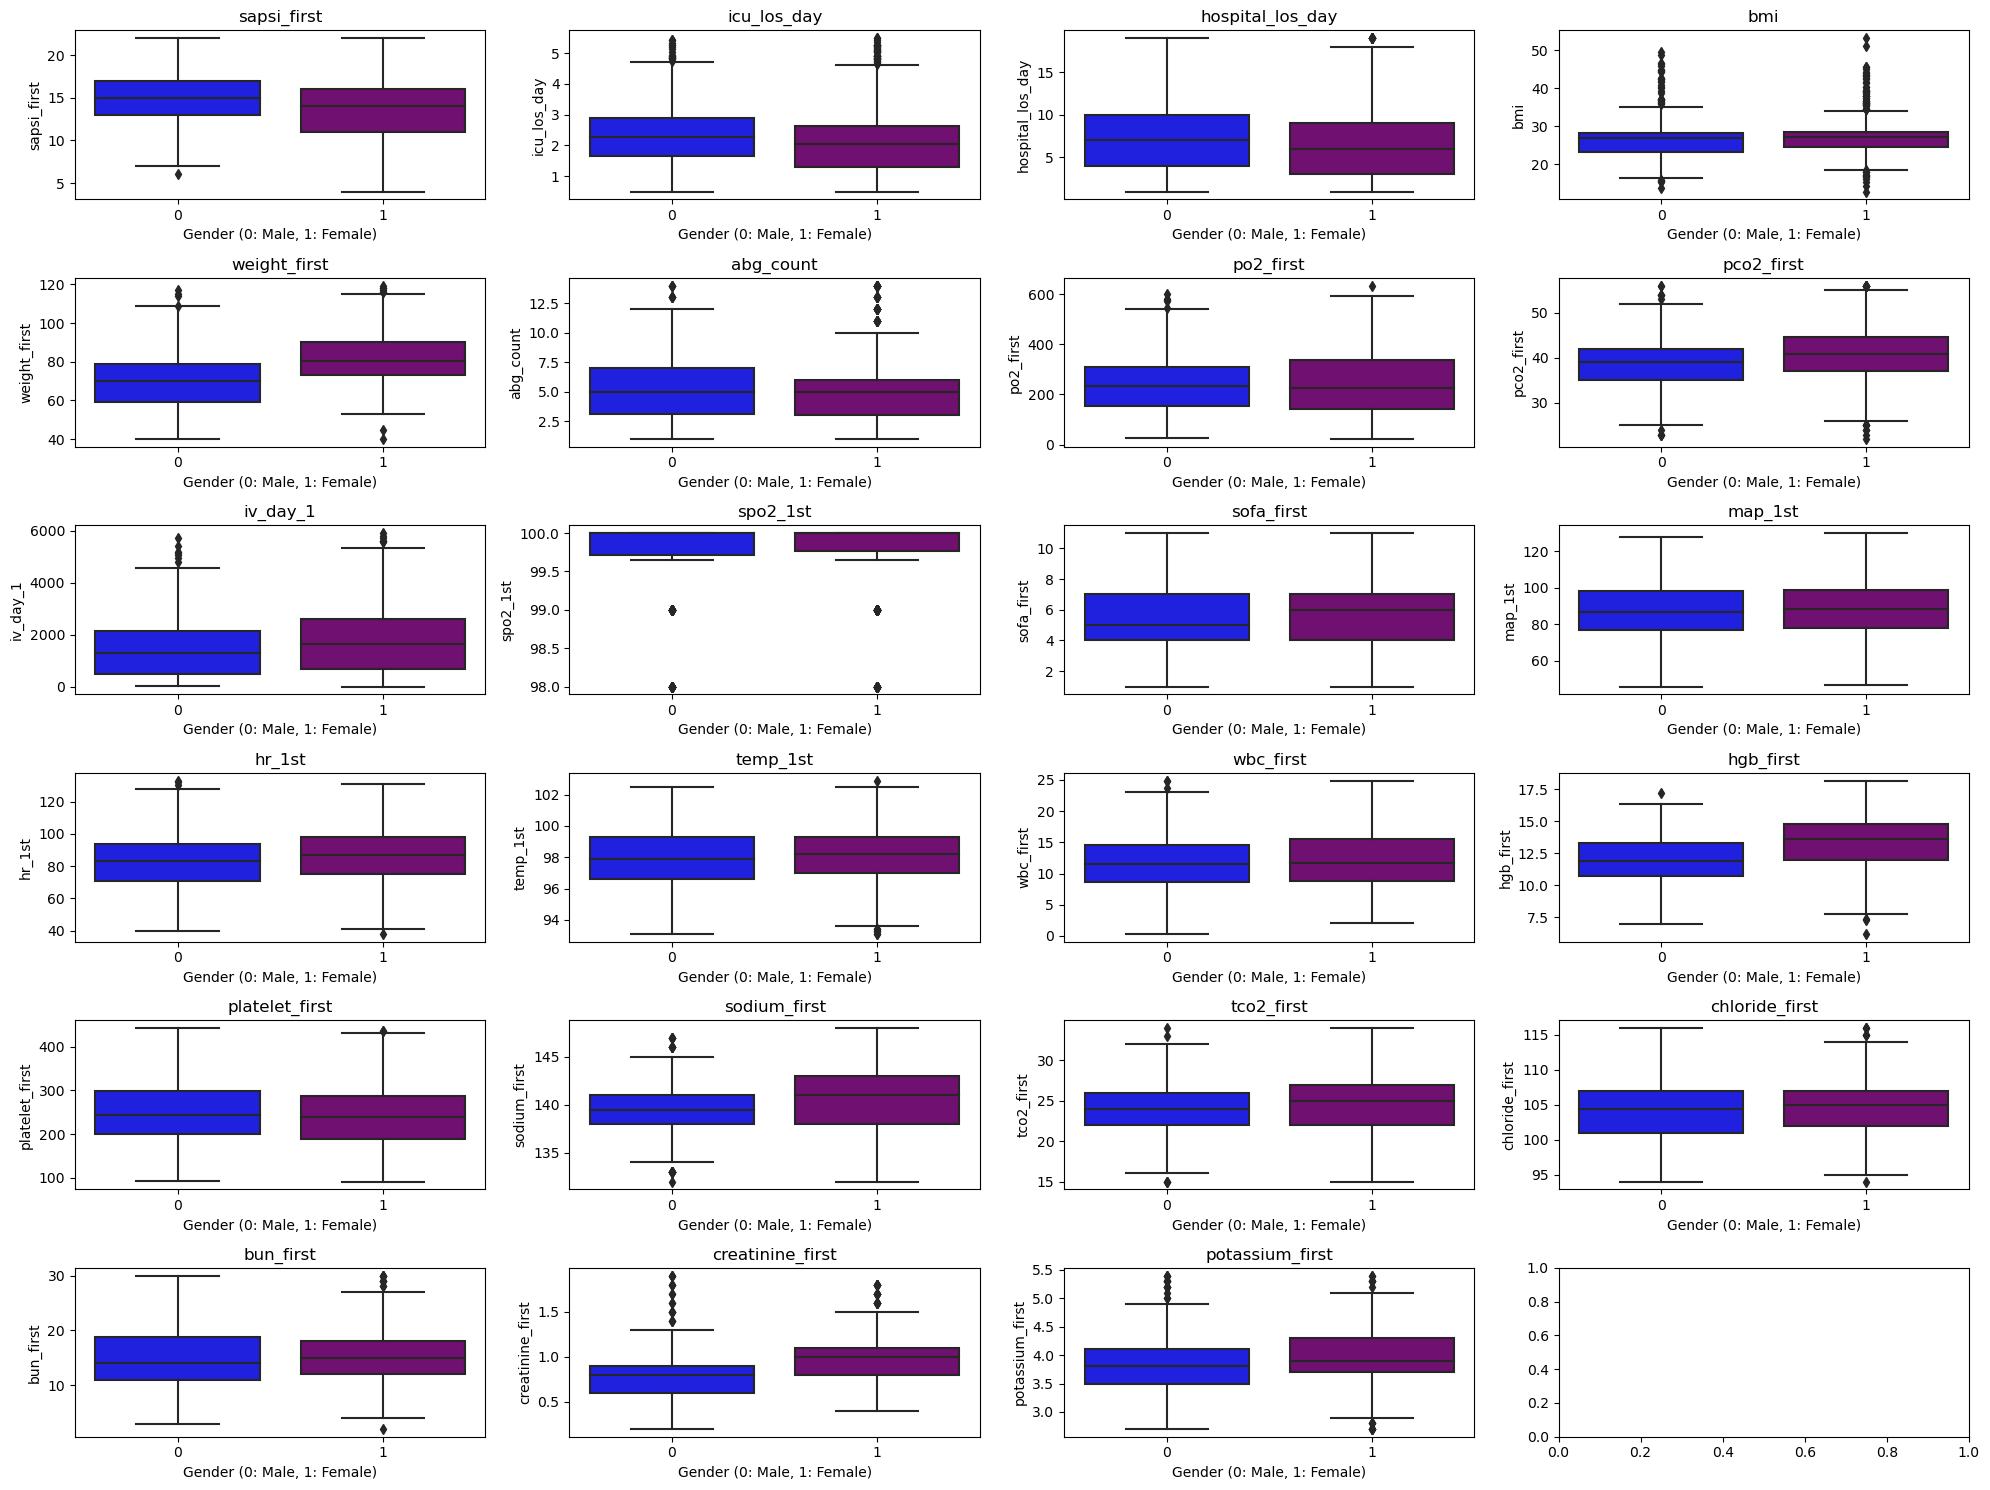

<Figure size 640x480 with 0 Axes>

In [126]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 15))

count = 0

for variable in num_vars_ints.columns:
    count += 1
    ax = axes.flatten()[count - 1]  
    
    sns.boxplot(x='gender_num', y= variable, data=df, ax=ax, palette={0: 'blue', 1: 'purple'})

    ax.set_title(variable)
    ax.set_xlabel('Gender (0: Male, 1: Female)')
    ax.set_ylabel(variable)  


plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

In [127]:
df

,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,service_unit,service_num,day_icu_intime,day_icu_intime_num,hour_icu_intime,hosp_exp_flg,icu_exp_flg,day_28_flg,mort_day_censored,censor_flg,sepsis_flg,chf_flg,afib_flg,renal_flg,liver_flg,copd_flg,cad_flg,stroke_flg,mal_flg,resp_flg,map_1st,hr_1st,temp_1st,spo2_1st,abg_count,wbc_first,hgb_first,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,2.400648,13.000000,72.36841,1,75.000000,29.912791,15.0,9.0,SICU,1,Friday,6,6,1,0,1,11.92,0,0,0,0,0,0,0,0,0,1,0,92.000,86.0,95.900002,100.0,5.405660,8.100000,14.1,354.00000,138.0,4.600000,15.0,109.0,17.507692,1.6,196.000000,39.000000,2230.875000
1,1,0.580000,3.000000,44.49191,0,80.924576,27.834917,21.0,7.0,SICU,1,Saturday,7,4,1,1,1,0.00,0,0,0,0,0,0,0,0,0,1,0,101.000,125.0,100.099998,100.0,4.000000,7.100000,12.6,262.00000,139.0,4.200000,31.0,100.0,16.000000,0.5,146.000000,23.000000,1961.225132
2,1,1.750000,5.000000,23.74217,1,95.200000,28.464563,18.0,7.0,SICU,1,Saturday,7,7,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,105.000,107.0,96.300003,100.0,9.000000,4.800000,10.7,271.98374,146.0,3.400000,19.0,110.0,10.000000,1.0,134.000000,30.000000,2358.244141
3,0,1.380000,9.000000,36.54657,1,72.000000,23.982402,14.0,5.0,SICU,1,Sunday,1,12,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,104.000,90.0,98.400002,100.0,5.485149,12.100000,14.4,182.00000,145.0,3.600000,26.0,110.0,10.000000,0.7,245.040650,41.000000,1877.560059
4,1,2.038264,6.008403,24.64717,1,90.000000,25.474850,15.0,6.0,SICU,1,Saturday,7,22,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,1,101.667,94.0,100.400002,100.0,4.395833,21.600000,13.4,130.00000,143.0,3.800000,32.0,104.0,17.000000,1.3,38.000000,41.180952,648.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0,2.270000,2.000000,50.15744,0,79.826875,27.400251,14.0,7.0,SICU,1,Saturday,7,18,1,1,1,1.42,0,0,0,0,0,0,0,0,1,0,1,112.000,98.0,100.300003,99.0,1.000000,11.700000,11.2,159.00000,139.0,4.000000,22.0,103.0,22.000000,1.2,144.000000,36.000000,650.000000
978,0,1.080000,3.000000,77.96057,0,77.417647,27.802770,16.0,5.0,SICU,1,Friday,6,12,1,0,1,2.67,0,0,0,1,0,0,0,0,1,0,0,85.000,68.0,98.000000,100.0,5.405660,13.700000,12.2,312.00000,142.0,3.300000,24.0,107.0,16.000000,0.8,220.182482,39.651163,150.000000
979,0,2.450000,3.000000,33.04643,1,84.000000,27.093683,16.0,6.0,SICU,1,Saturday,7,11,0,0,0,731.00,1,0,0,0,0,0,0,0,0,0,0,103.000,92.0,98.800003,100.0,1.000000,14.277778,10.2,177.00000,138.0,3.700000,15.0,113.0,15.000000,1.2,158.000000,45.000000,1836.659912
980,1,3.700000,4.000000,72.44020,0,60.000000,27.802770,14.0,5.0,SICU,1,Saturday,7,23,1,1,1,3.21,0,0,0,1,0,0,0,0,1,1,0,94.000,50.0,98.400002,99.0,4.000000,7.600000,14.6,363.00000,138.0,4.026812,22.0,104.0,20.000000,0.8,154.000000,45.000000,289.950012


In [128]:
# Columns to drop
columns_to_drop = ['service_num', 'service_unit','day_icu_intime','bmi','day_28_flg',
                   'mort_day_censored','censor_flg','aline_flg']

df = df.drop(columns=columns_to_drop)


df

,icu_los_day,hospital_los_day,age,gender_num,weight_first,sapsi_first,sofa_first,day_icu_intime_num,hour_icu_intime,hosp_exp_flg,icu_exp_flg,sepsis_flg,chf_flg,afib_flg,renal_flg,liver_flg,copd_flg,cad_flg,stroke_flg,mal_flg,resp_flg,map_1st,hr_1st,temp_1st,spo2_1st,abg_count,wbc_first,hgb_first,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,2.400648,13.000000,72.36841,1,75.000000,15.0,9.0,6,6,1,0,0,0,0,0,0,0,0,0,1,0,92.000,86.0,95.900002,100.0,5.405660,8.100000,14.1,354.00000,138.0,4.600000,15.0,109.0,17.507692,1.6,196.000000,39.000000,2230.875000
1,0.580000,3.000000,44.49191,0,80.924576,21.0,7.0,7,4,1,1,0,0,0,0,0,0,0,0,1,0,101.000,125.0,100.099998,100.0,4.000000,7.100000,12.6,262.00000,139.0,4.200000,31.0,100.0,16.000000,0.5,146.000000,23.000000,1961.225132
2,1.750000,5.000000,23.74217,1,95.200000,18.0,7.0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,105.000,107.0,96.300003,100.0,9.000000,4.800000,10.7,271.98374,146.0,3.400000,19.0,110.0,10.000000,1.0,134.000000,30.000000,2358.244141
3,1.380000,9.000000,36.54657,1,72.000000,14.0,5.0,1,12,0,0,0,0,0,0,0,0,0,0,0,0,104.000,90.0,98.400002,100.0,5.485149,12.100000,14.4,182.00000,145.0,3.600000,26.0,110.0,10.000000,0.7,245.040650,41.000000,1877.560059
4,2.038264,6.008403,24.64717,1,90.000000,15.0,6.0,7,22,0,0,0,0,0,0,0,0,0,0,0,1,101.667,94.0,100.400002,100.0,4.395833,21.600000,13.4,130.00000,143.0,3.800000,32.0,104.0,17.000000,1.3,38.000000,41.180952,648.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,2.270000,2.000000,50.15744,0,79.826875,14.0,7.0,7,18,1,1,0,0,0,0,0,0,0,1,0,1,112.000,98.0,100.300003,99.0,1.000000,11.700000,11.2,159.00000,139.0,4.000000,22.0,103.0,22.000000,1.2,144.000000,36.000000,650.000000
978,1.080000,3.000000,77.96057,0,77.417647,16.0,5.0,6,12,1,0,0,0,1,0,0,0,0,1,0,0,85.000,68.0,98.000000,100.0,5.405660,13.700000,12.2,312.00000,142.0,3.300000,24.0,107.0,16.000000,0.8,220.182482,39.651163,150.000000
979,2.450000,3.000000,33.04643,1,84.000000,16.0,6.0,7,11,0,0,0,0,0,0,0,0,0,0,0,0,103.000,92.0,98.800003,100.0,1.000000,14.277778,10.2,177.00000,138.0,3.700000,15.0,113.0,15.000000,1.2,158.000000,45.000000,1836.659912
980,3.700000,4.000000,72.44020,0,60.000000,14.0,5.0,7,23,1,1,0,0,1,0,0,0,0,1,1,0,94.000,50.0,98.400002,99.0,4.000000,7.600000,14.6,363.00000,138.0,4.026812,22.0,104.0,20.000000,0.8,154.000000,45.000000,289.950012


In [129]:
df.dtypes

icu_los_day           float64
hospital_los_day      float64
age                   float64
gender_num              int64
weight_first          float64
sapsi_first           float64
sofa_first            float64
day_icu_intime_num      int64
hour_icu_intime         int64
hosp_exp_flg            int64
icu_exp_flg             int64
sepsis_flg              int64
chf_flg                 int64
afib_flg                int64
renal_flg               int64
liver_flg               int64
copd_flg                int64
cad_flg                 int64
stroke_flg              int64
mal_flg                 int64
resp_flg                int64
map_1st               float64
hr_1st                float64
temp_1st              float64
spo2_1st              float64
abg_count             float64
wbc_first             float64
hgb_first             float64
platelet_first        float64
sodium_first          float64
potassium_first       float64
tco2_first            float64
chloride_first        float64
bun_first 

## 7) Normalizing the Data

In [130]:
scaler = StandardScaler()

X = df.drop(['hosp_exp_flg','icu_exp_flg'], axis=1) 
Y = df['icu_exp_flg']

# Fitting the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X)



X_train, X_test, Y_train, Y_test = train_test_split(X_train_scaled, Y, test_size=0.2, random_state=42)

In [131]:
print(X_train_scaled[:5])

[[ 0.14811135  1.32512289  0.89845693  0.78599772 -0.16365999  0.24947253
   1.69966832  0.95721251 -0.54002778  0.         -0.25959835 -0.35335084
  -0.11582699 -0.21658328 -0.22916971 -0.26182585 -0.4769696   2.56004808
  -0.42960413  0.23366154  0.03306186 -1.18385476  0.49098042  0.0671165
  -0.86799865  0.63125556  1.44687173 -0.63506381  1.33729619 -2.61933749
   1.05544448  0.41320033  2.50544526 -0.38204419 -0.17571697  0.42576821]
 [-1.46582717 -0.92594382 -0.40436782 -1.27226832  0.23260643  1.89508802
   0.6563688   1.45298397 -0.79492194  0.         -0.25959835 -0.35335084
  -0.11582699 -0.21658328 -0.22916971 -0.26182585 -0.4769696   2.56004808
  -0.42960413  0.81296544  2.25397487  1.15157734  0.49098042 -0.39707447
  -1.07830922 -0.10550739  0.22340606 -0.32006756  0.54728424  1.91860038
  -1.08745383  0.13598044 -1.54680234 -0.75549796 -2.70216191  0.21461425]
 [-0.42866462 -0.47573048 -1.37411921  0.78599772  1.18742089  1.07228028
   0.6563688   1.45298397 -0.41258071

## 8) PCA Components

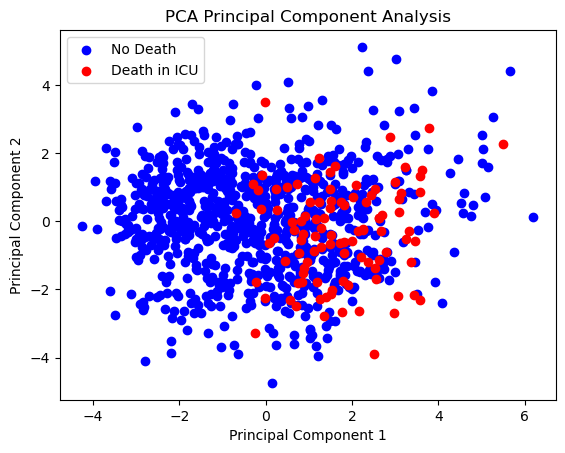

In [132]:
from sklearn.decomposition import PCA

class_labels = ['No Death', 'Death in ICU']
colors = ['blue', 'red']

# Define X_r as the scaled data
X_r = X_train_scaled

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_r)


for label_value, color in zip(np.unique(Y), colors):
    indices = np.where(Y == label_value)
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=class_labels[label_value], color=color)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Principal Component Analysis')
plt.legend()
plt.show()

In [133]:
# DataFrame with principal components and target variable
pc_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pc_df['icu_exp_flg'] = Y

pc_df

,PC1,PC2,icu_exp_flg
0,0.613861,1.367033,0
1,0.760439,-0.936955,1
2,-1.534148,-0.304908,0
3,-2.074468,-0.438225,0
4,-0.636464,2.283195,0
...,...,...,...
977,1.357000,0.090971,1
978,1.427147,-1.574263,0
979,-1.411031,0.024429,0
980,2.780474,-0.891356,1


In [134]:
print(np.isnan(pca_result).any())

False


## 9) Using Logistic Regression

In [135]:

log_reg_model = LogisticRegression(max_iter=1000, solver='liblinear')


log_reg_model.fit(X_train, Y_train)


y_pred = log_reg_model.predict(X_test)


accuracy = accuracy_score(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)
acc_log_reg_model = round(log_reg_model.score(X_train, Y_train) * 100, 2)

# Results of the accuracy of the model
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

print(" ")

k_folds = KFold(n_splits=5)

# Perform cross-validation
scores = cross_val_score(log_reg_model, X_train, Y_train, cv=k_folds, scoring='accuracy')

# Cross-Validation scores
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))



Accuracy: 0.9390862944162437
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       178
           1       0.82      0.47      0.60        19

    accuracy                           0.94       197
   macro avg       0.88      0.73      0.78       197
weighted avg       0.93      0.94      0.93       197

 
Cross Validation Scores:  [0.9044586  0.89171975 0.94267516 0.9044586  0.92356688]
Average CV Score:  0.913375796178344
Number of CV Scores used in Average:  5


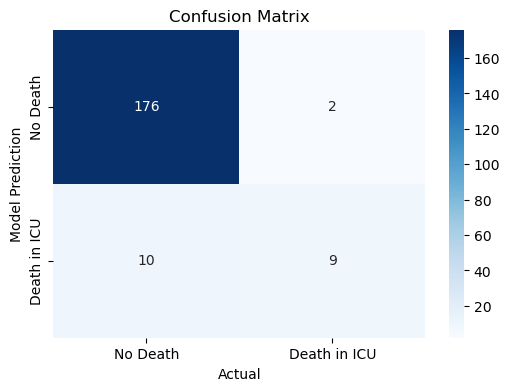

In [136]:
# Define class "No Death" and "Death in ICU"

class_labels = ["No Death", "Death in ICU"]

# Confusion Matrix
confu_matrix = confusion_matrix(Y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=class_labels, yticklabels=class_labels)


plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Model Prediction')


plt.show()